In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set()

In [3]:
plt.close('all')
num = 24999
run = 1
path = f"/data/logs/2018-06-07-1859-bm-rep-big-fitprop/other_noinv/run_{run}/rep00"
logpath = f"{path}/analysis_log_{num}.txt"


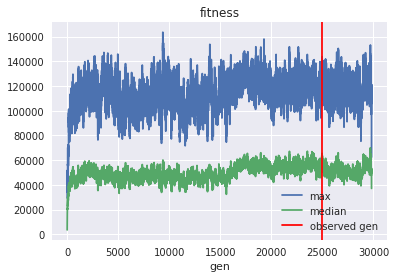

In [4]:
fail = False
fig, ax = plt.subplots()

try:
    fitpath = f"{path}/fitnesslog.txt"
    fit = pd.read_csv(fitpath, delimiter="\t")
except pd.errors.EmptyDataError:
    fail = True
else:
    fit.groupby('gen')['fitness'].max().plot(ax=ax, label='max')
    fit.groupby('gen')['fitness'].median().plot(ax=ax, label='median')

if fail:
    fitpath = f"{path}/../fit.txt"
    pd.read_csv(fitpath, delimiter="\t") 
    fit.plot(ax=ax)

ax.axvline(num, label="observed gen", color="red")
ax.legend()
ax.set_title('fitness')
plt.show(fig)

In [5]:
df = pd.read_csv(logpath, delimiter="\t")

In [6]:
m = df.groupby(['ind', 'coop'], as_index=False).mean();

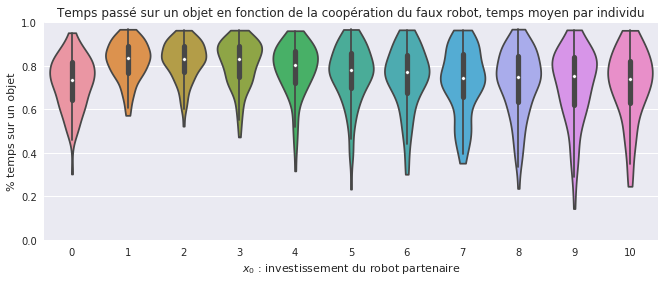

In [7]:
plt.figure(figsize=(11, 4))
sns.violinplot(data=m, x='coop', y='onOpp', cut=0, scale='count')
plt.title("Temps passé sur un objet en fonction de la coopération du faux robot, temps moyen par individu")
plt.ylabel("% temps sur un objet")
plt.ylim(0, 1)
plt.xlabel("$x_0$ : investissement du robot partenaire");

In [8]:
df['totCoop'] = df['coop'] + df['ownCoop']

In [9]:
df['truecoop'] = np.where(df['onOpp'], df['ownCoop'], np.nan)
#df['truecoop'][np.where(np.isnan(df['truecoop']))[0] + 1] = np.nan

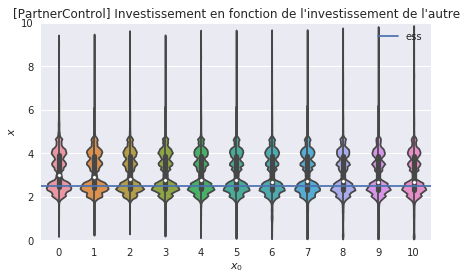

In [10]:
plt.figure(figsize=(7, 4))
sns.violinplot(data=df.query('onOpp == 1'), cut=0, x='coop', y='ownCoop', scale='count')
plt.axhline(2.5, label='ess')
plt.title("[PartnerControl] Investissement en fonction de l'investissement de l'autre")
plt.legend()
plt.ylabel("$x$")
plt.xlabel("$x_0$")
plt.ylim(0, 10);

In [11]:
df['truecoop'] = np.where(df['onOpp'], df['ownCoop'], np.nan)

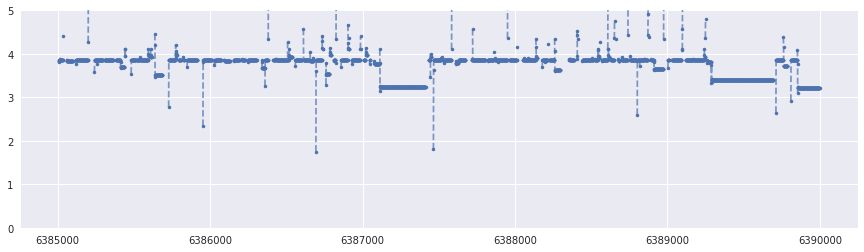

In [12]:
fig, ax = plt.subplots(figsize=(15, 4))
df.query('ind == 23 and coop == 2 and rep == 2')['truecoop'].plot(ax=ax, style='.')
df.query('ind == 23 and coop == 2 and rep == 2')['truecoop'].plot(ax=ax, style='--', alpha=0.7, c=sns.palettes.get_color_cycle()[0])
ax.set_ylim(0, 5)
plt.show()

In [13]:
best = df.groupby('ind', as_index=False).mean()['truecoop'].nlargest(20).index
worst = df.groupby('ind', as_index=False).mean()['truecoop'].nsmallest(20).index

In [44]:
m.loc[np.where(m['ind'].isin(best))[0], 'good'] = 'Cooperateur'
m.loc[np.where(m['ind'].isin(worst))[0], 'good'] = 'Egoiste'

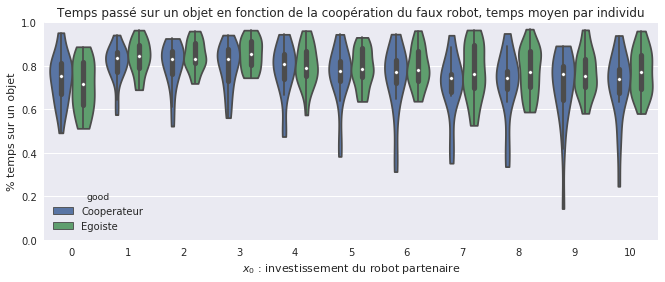

In [45]:
plt.figure(figsize=(11, 4))
sns.violinplot(data=m, x='coop', y='onOpp', cut=0, scale='count', hue='good')
plt.title("Temps passé sur un objet en fonction de la coopération du faux robot, temps moyen par individu")
plt.ylabel("% temps sur un objet")
plt.ylim(0, 1)
plt.xlabel("$x_0$ : investissement du robot partenaire");

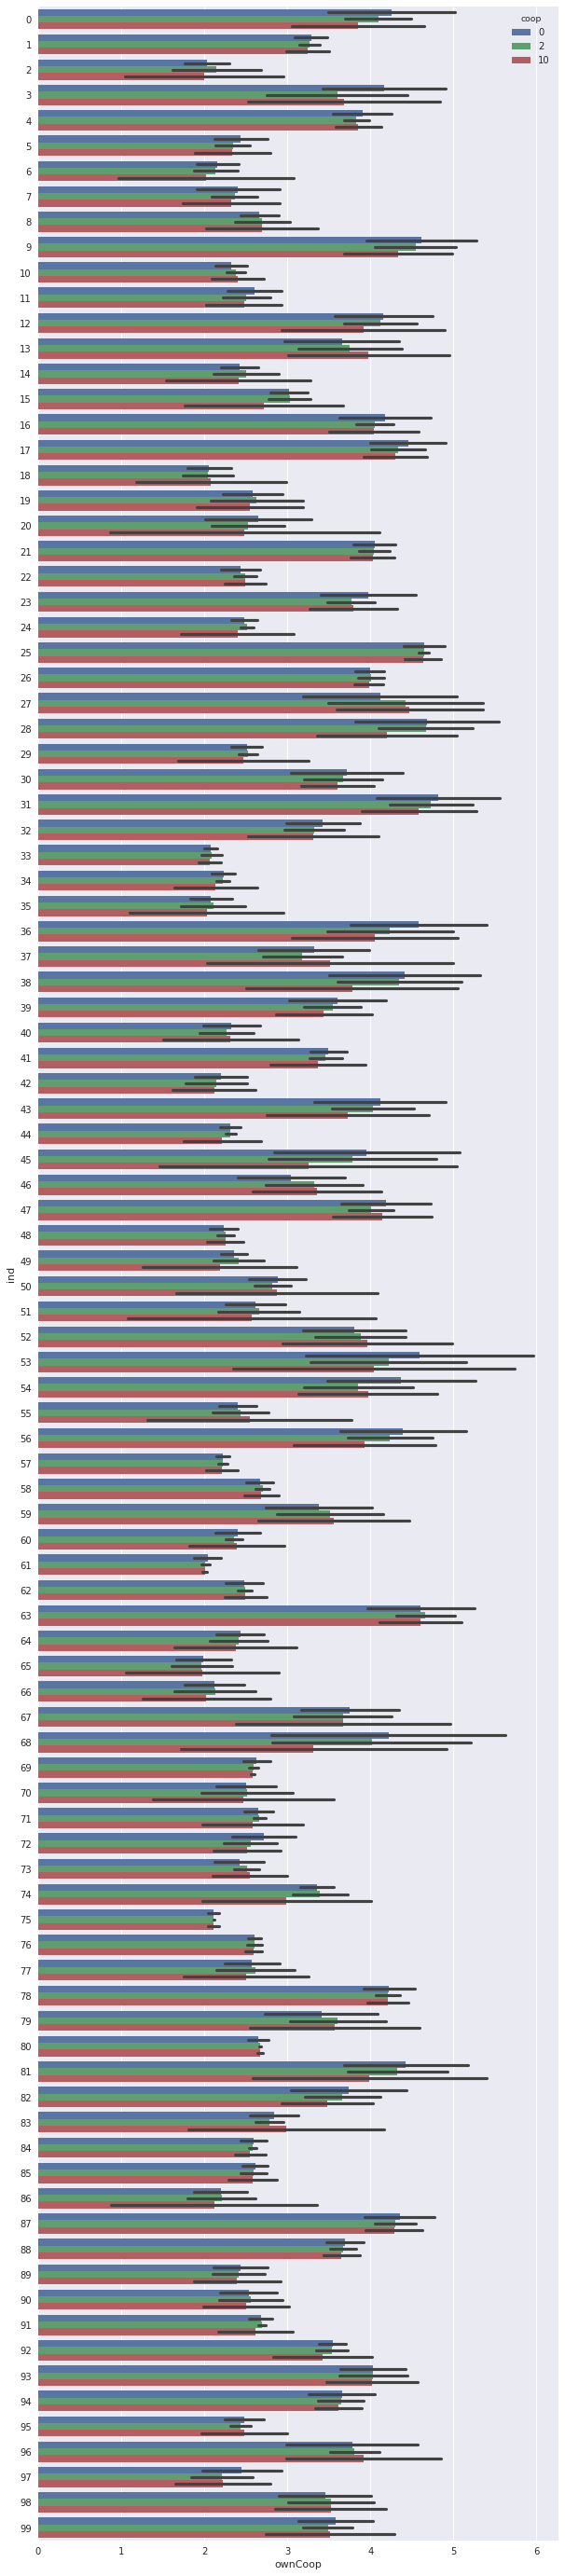

In [43]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 50))
sns.barplot(data=df.query('onOpp == 1 and ind < 100 and (coop==0 or coop==2 or coop==10)'), y='ind', x='ownCoop', orient='h', hue='coop',  ci='sd', ax=ax)